In [21]:
# importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from google.colab import drive

In [22]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/sms_spam.csv')

In [24]:
# Display the first few rows of the dataset
print(data.head())

   type                                               text
0   ham  Hope you are having a good week. Just checking in
1   ham                            K..give back my thanks.
2   ham        Am also doing in cbe only. But have to pay.
3  spam  complimentary 4 STAR Ibiza Holiday or £10,000 ...
4  spam  okmail: Dear Dave this is your final notice to...


In [25]:
# Display the last few rows of the dataset
print(data.tail())

      type                                               text
5554   ham  You are a great role model. You are giving so ...
5555   ham  Awesome, I remember the last time we got someb...
5556  spam  If you don't, your prize will go to another cu...
5557  spam  SMS. ac JSco: Energy is high, but u may not kn...
5558   ham                    Shall call now dear having food


In [27]:
# Preprocess the data
# Rename columns for convenience
data.columns = ['label', 'message']

In [28]:
# Convert label to numerical values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [29]:
# Split the data into features and labels
X = data['message']
y = data['label']

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [32]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test_vec)

In [34]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [35]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       963
           1       0.98      0.87      0.92       149

    accuracy                           0.98      1112
   macro avg       0.98      0.93      0.95      1112
weighted avg       0.98      0.98      0.98      1112



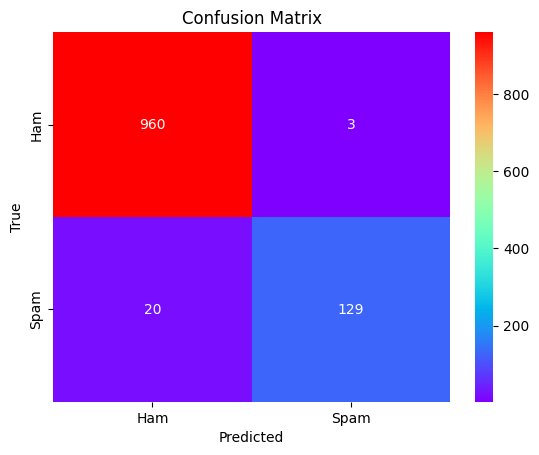

In [36]:
# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [37]:
# Function to predict if a message is ham or spam
def predict_message(message):
    message_vec = vectorizer.transform([message])
    prediction = model.predict(message_vec)
    return 'ham' if prediction[0] == 0 else 'spam'

In [38]:
# Test the function with user input
user_input = input("Enter a message to classify: ")
print("The message is:", predict_message(user_input))

Enter a message to classify: 1000's of girls many local 2 u who r virgins 2 this & r ready 2 4fil ur every sexual need. Can u 4fil theirs? text CUTE to 69911(Â£1.50p. m)
The message is: spam
